In [112]:
import tifffile as tiff
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.gridspec as gridspec
from sklearn.metrics import r2_score
from os.path import basename, splitext

In [11]:
def axisRemover():
    plt.xticks(())
    plt.yticks(())

In [114]:
splitext(basename(in_file))[0]

'test1'

In [9]:
in_file = "data/test1.tif"
with tiff.TiffFile(in_file) as tif:
    images = tif.asarray()
    metadata = tif[0].tags
df = pd.DataFrame({"chan1":images[0].flatten(), "chan2":images[1].flatten()}, )
img_shape = images[0].shape

In [67]:
df_filter = df.copy()
df_filter[df_filter == 0] = np.nan
df_fix = df_filter - df_filter.min()
df_fix[(df_fix["chan1"] < (0.1 * df_fix["chan1"].max())) & (df_fix["chan2"] < (0.1 * df_fix["chan2"].max()))] = np.nan

chan1    22338.0
chan2    26352.0
dtype: float64

In [68]:
df_X = df_fix["chan1"].dropna().values.reshape(-1,1)
df_y = df_fix["chan2"].dropna().values.reshape(-1,1)

lm = LinearRegression()
lm.fit(X = df_X, y = df_y)
predictions = lm.predict(df_X)
rsquared = r2_score(df_y, predictions)
coef = lm.coef_

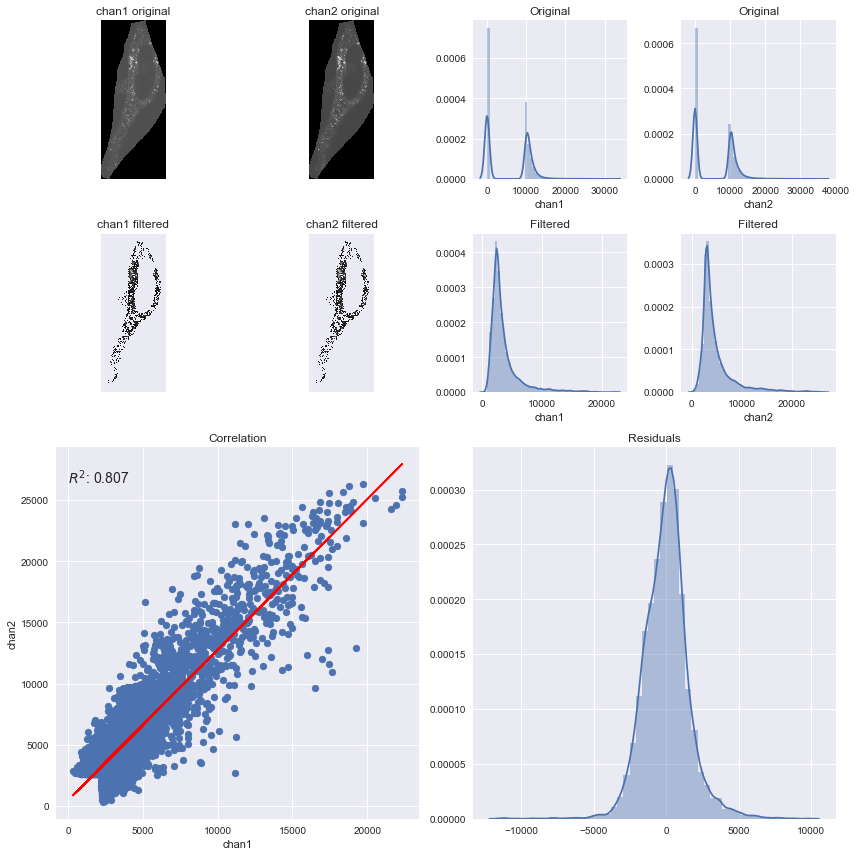

In [117]:
plt.figure(figsize=(12,12))
G = gridspec.GridSpec(4, 4)

ax_1 = plt.subplot(G[0,0])
ax_1.imshow(df["chan1"].values.reshape(img_shape), cmap = plt.cm.gray)
axisRemover()
ax_1.set(title = "{} original".format(df.columns[0]))

ax_2 = plt.subplot(G[0,1])
ax_2.imshow(df["chan2"].values.reshape(img_shape), cmap = plt.cm.gray)
axisRemover()
ax_2.set(title = "{} original".format(df.columns[1]))

ax_3 = plt.subplot(G[0,2])
sns.distplot(df["chan1"], axlabel=df.columns[0])
ax_3.set(title = "Original")

ax_4 = plt.subplot(G[0,3])
sns.distplot(df["chan2"], axlabel=df.columns[1])
ax_4.set(title = "Original")

ax_5 = plt.subplot(G[1,0])
ax_5.imshow(df_fix["chan1"].values.reshape(img_shape), cmap = plt.cm.gray)
axisRemover()
ax_5.set(title = "{} filtered".format(df.columns[0]))

ax_6 = plt.subplot(G[1,1])
ax_6.imshow(df_fix["chan2"].values.reshape(img_shape), cmap = plt.cm.gray)
axisRemover()
ax_6.set(title = "{} filtered".format(df.columns[1]))

ax_7 = plt.subplot(G[1,2])
sns.distplot(df_fix["chan1"].dropna(), axlabel=df.columns[0])
ax_7.set(title = "Filtered")

ax_8 = plt.subplot(G[1,3])
sns.distplot(df_fix["chan2"].dropna(), axlabel=df.columns[1])
ax_8.set(title = "Filtered")

ax_9 = plt.subplot(G[2:, :2])
plt.scatter(df_fix["chan1"].dropna(), df_fix["chan2"].dropna())
plt.plot(df_X, predictions, color = "red")
plt.text(x = 1, y = df_fix["chan2"].max(), s = "$R^2$: {}".format(round(rsquared, 3)), fontsize = 14)
ax_9.set(xlabel = df.columns[0], ylabel = df.columns[1], title = "Correlation")

ax_10 = plt.subplot(G[2:, 2:])
sns.distplot((df_y - predictions), bins = 50)
ax_10.set(title = "Residuals")

plt.tight_layout()

plt.savefig("{}.pdf".format(splitext(basename(in_file))[0]), dpi = 300, papertype = "a4")


In [57]:
(df_filter - df_filter.min()).min()

chan1    0.0
chan2    0.0
dtype: float64

In [94]:
"{} original".format(df.columns[0])

'chan1 original'